In [26]:
import numpy as np
import pandas as pd 
import random
import math
from matplotlib import pyplot as plt
import sklearn.datasets
ds = sklearn.datasets.load_iris()

In [28]:
df = pd.DataFrame(ds['data'], columns = ds['feature_names'])
#df.to_csv(r'data.csv')

In [30]:
code_species_map=dict(zip(range(3),ds['target_names']))
print(code_species_map)
df['speciess']=[code_species_map[c] for c in ds['target']]
## 0 1 2 diye gösterilen targetlere isim ekledi

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


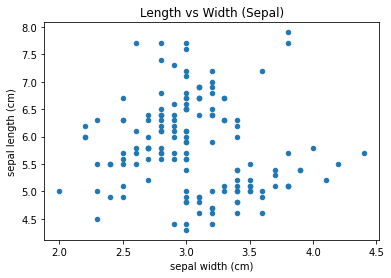

In [31]:
df.plot(kind="scatter",x="sepal width (cm)", y="sepal length (cm)")
plt.title("Length vs Width (Sepal)")
plt.show()

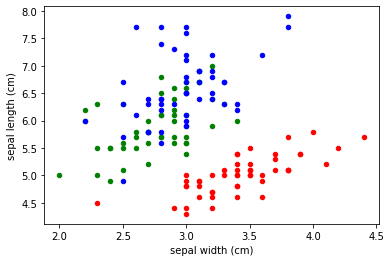

In [32]:
colors=["r","g","b"]
fig, ax=plt.subplots(1,1)

for i,spec in enumerate(df['speciess'].unique()):
    df_color=df[df['speciess']==spec]
    df_color.plot(kind="scatter",x="sepal width (cm)",y="sepal length (cm)",ax=ax,color=colors[i])

plt.show()

#df['speciess'].unique() bu specieslerin kümesi. enumerate ile bunları döndürüyoruz. 
# Yanı aslında 3 kere dönüyor. Sonrasını biliyon


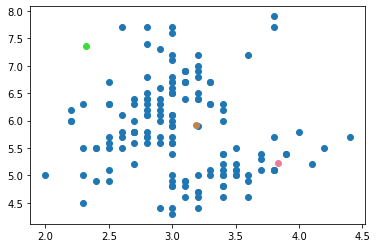

In [61]:
def findCenter(k):
    min_x = df["sepal width (cm)"].min()
    max_x = df["sepal width (cm)"].max()
    min_y = df["sepal length (cm)"].min()
    max_y =  df["sepal length (cm)"].max()

    rand_centers_x=[]
    rand_centers_y=[]
    random.seed(1)
    for i in range(0,k):
        rand_centers_x.append(random.uniform(min_x,max_x))
        rand_centers_y.append(random.uniform(min_y,max_y))
    
    plt.scatter(df["sepal width (cm)"], df["sepal length (cm)"])
    rgb=[]
    np.random.seed(5)
    for i in range(0,k):
        rgb.append(np.random.rand(3,))
        plt.scatter(rand_centers_x[i],rand_centers_y[i],color=rgb[i])
 
    return rand_centers_x,rand_centers_y,rgb

rand_x,rand_y,colors=findCenter(3)

In [62]:
def findCluster(k,rand_x,rand_y):
    distances=[]
    clusters=[]
    for i in range(0,k):
        distances.append(pow(df["sepal length (cm)"]-rand_y[i],2)+pow(df["sepal width (cm)"]-rand_x[i],2))
        distances[i]=np.sqrt(distances[i])
    
    listdist=list(zip(*distances))
    for i,tuple in enumerate(listdist):
        clusters.append(tuple.index(min(tuple)))
    return clusters
    
clusters=findCluster(3,rand_x,rand_y)



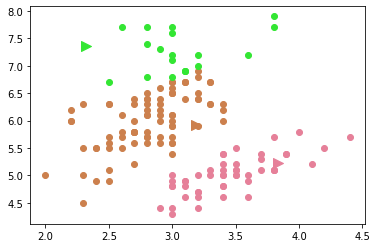

In [63]:
def show(clusters,rand_x,rand_y):
    df["clusters"]=clusters;

    for i,clus in enumerate(df['clusters'].unique()):
        df_cluster=df[df['clusters']==clus]
        plt.scatter(df_cluster["sepal width (cm)"],df_cluster["sepal length (cm)"],color=np.round(colors[clus],1))
        plt.scatter(rand_x[clus],rand_y[clus],color=np.round(colors[clus],1),marker='>',s=100)
    plt.show()      
    
show(clusters,rand_x,rand_y)    

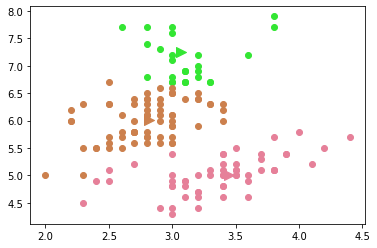

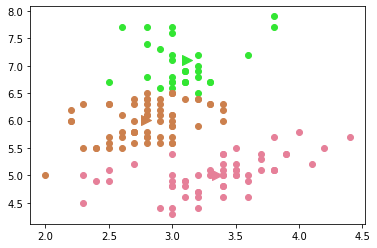

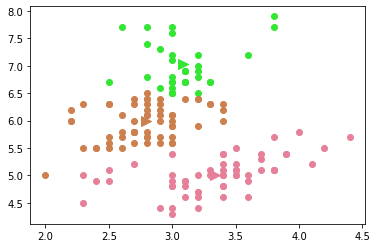

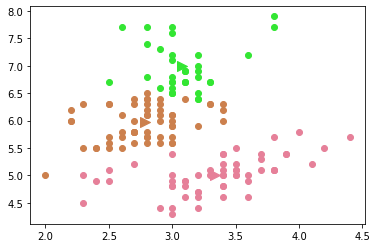

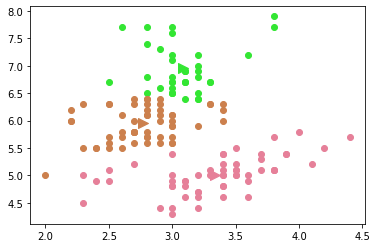

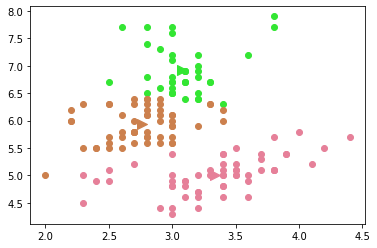

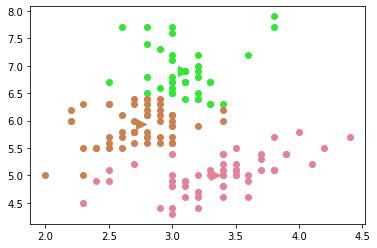

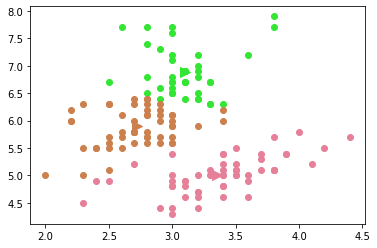

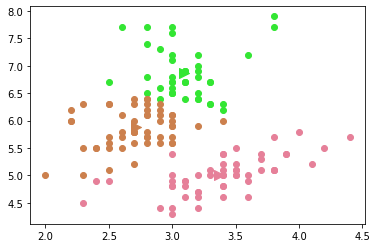

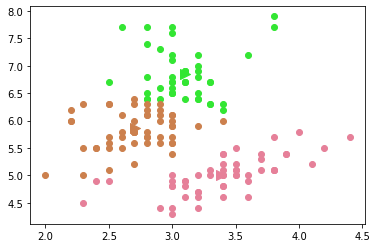

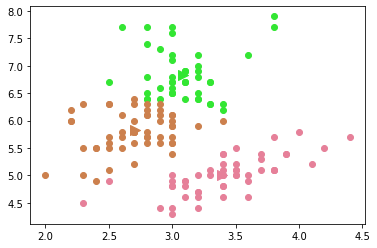

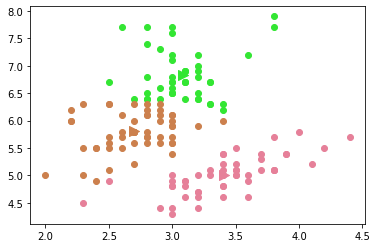

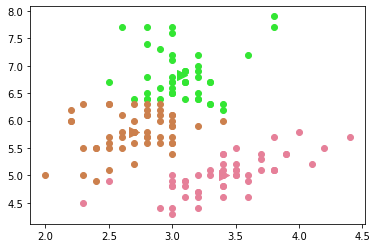

In [64]:
def iterasyon(k):
    randx=[0]*k
    randy=[0]*k
    while(True):
        rand_y=df.groupby("clusters").mean()["sepal length (cm)"]
        rand_x=df.groupby("clusters").mean()["sepal width (cm)"]
        if(np.array_equal(rand_y, randy) and np.array_equal(rand_x, randx)):
            break;
        else:
            randx=rand_x
            randy=rand_y
        clusters=findCluster(3,rand_x,rand_y)
        show(clusters,rand_x,rand_y) 
    return clusters,rand_x,rand_y
# hem center değiştiğinde hem de kümeler yeni centera göre değiştiğinde gösyeriyor
clusters,rand_x,rand_y = iterasyon(3)


Mavi ve yeşil kümeler birbirinin içersinde oldukları i.im kmeans methodu ile doğru bir şekilde ayrıştırılamadılar. Belki veri kümesinde bulunan diğer iki özellleri ile kümelenebilirlerdi. Kırmızı küme diğerlerinde uzakta bulunduğu için, uzaklık tabanlı k means algoritması diğer kümelere oranla daha doğru çalıştı. Veri setinin büyütülmesi veya farklı özelliklerin ele alınması ile belki daha iyi bir doğruluk oranı elde edilebilir. 
Kümelerin renkleri belirleyici bir ifade değil. Merkezler random olarak atandığı için farklı renk ile gösterilebilirler.


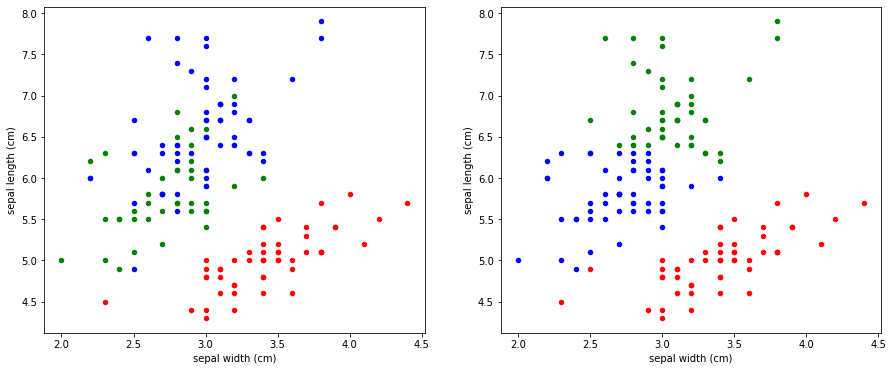

In [69]:
color=["r","g","b"]
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,6))

for i,spec in enumerate(df['speciess'].unique()):
    df_color=df[df['speciess']==spec]
    df_color.plot(kind="scatter",x="sepal width (cm)",y="sepal length (cm)",ax=ax1,color=color[i])

for i,clus in enumerate(df['clusters'].unique()):
    df_result=df[df['clusters']==clus]
    df_result.plot(kind="scatter",x="sepal width (cm)",y="sepal length (cm)",ax=ax2,color=color[i])
plt.show()
